In [1]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,roc_auc_score
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

path = './data/income_sheet_clean_after_pearson.csv'
#path = './data/balance_sheet_clean_after_pearson.csv'


In [2]:
# 取資料
df = pd.read_csv(path)
# # 拆分資料1 : 自己拆
# train_data = df[df['date']<1074]
# test_data = df[df['date']>=1074]

# X_train = train_data.iloc[:,3:-2].values
# y_train = train_data['label'].values
# X_test = test_data.iloc[:,3:-2].values
# y_test = test_data['label'].values

# # 拆分資料2 : 套件幫拆
features = df.iloc[:,3:-2]
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [3]:
# 建立隨機森林模型
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
# 訓練資料
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [4]:
for f in range(len(df.columns[3:-2])):
    print('({:>2d}){:30}\t{:<10f}' .format(f+1,df.columns[3:-2][f],rnd_clf.feature_importances_[f]))

( 1)營業收入                          	0.151895  
( 2)營業毛利（毛損）                      	0.561109  
( 3)未實現銷貨（損）益                     	0.000762  
( 4)已實現銷貨（損）益                     	0.000974  
( 5)營業費用                          	0.087002  
( 6)其他收益及費損淨額                     	0.001946  
( 7)營業外收入及支出                      	0.130519  
( 8)停業單位損益                        	0.001881  
( 9)合併前非屬共同控制股權損益                 	0.000000  
(10)其他綜合損益（淨額）                    	0.006852  
(11)合併前非屬共同控制股權綜合損益淨額             	0.000000  
(12)淨利（淨損）歸屬於共同控制下前手權益            	0.000058  
(13)淨利（淨損）歸屬於非控制權益                	0.056958  
(14)綜合損益總額歸屬於共同控制下前手權益            	0.000046  


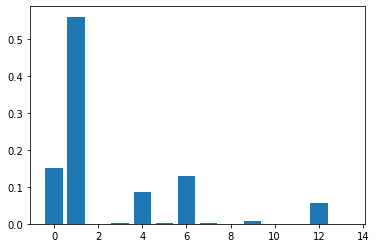

In [5]:
plt.bar(range(len(df.columns[3:-2])),rnd_clf.feature_importances_)
plt.show()

In [6]:
def plot_feature_importance(importance,names,model_type):
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
    # 建立array
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # 建立df
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # 遞減排序
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Searborn 
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

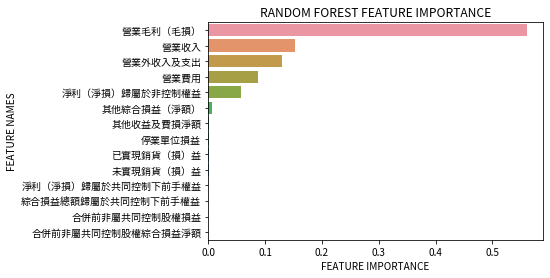

In [7]:
plot_feature_importance(rnd_clf.feature_importances_,df.columns[3:-2],'RANDOM FOREST')

In [8]:
# 以順序排序，確認個欄位的重要性:
featimp = pd.Series(rnd_clf.feature_importances_,index=df.columns[3:-2]).sort_values(ascending=False)
print(featimp)

營業毛利（毛損）              0.561109
營業收入                  0.151895
營業外收入及支出              0.130519
營業費用                  0.087002
淨利（淨損）歸屬於非控制權益        0.056958
其他綜合損益（淨額）            0.006852
其他收益及費損淨額             0.001946
停業單位損益                0.001881
已實現銷貨（損）益             0.000974
未實現銷貨（損）益             0.000762
淨利（淨損）歸屬於共同控制下前手權益    0.000058
綜合損益總額歸屬於共同控制下前手權益    0.000046
合併前非屬共同控制股權綜合損益淨額     0.000000
合併前非屬共同控制股權損益         0.000000
dtype: float64


In [9]:
# 預測 predict:獲取結果
pre_X_train = rnd_clf.predict(X_train)
pre_X_test = rnd_clf.predict(X_test)
print('pre test score:',pre_X_test)

pre test score: [0 1 1 ... 1 1 1]


In [10]:
# 預測 predict_proba:獲取0或1結果的機率
predict_proba_X_train = rnd_clf.predict_proba(X_train)
predict_proba_X_test = rnd_clf.predict_proba(X_test)
print('predict_proba test score:',predict_proba_X_test)

predict_proba test score: [[0.70247941 0.29752059]
 [0.45979459 0.54020541]
 [0.45929397 0.54070603]
 ...
 [0.17246788 0.82753212]
 [0.12392174 0.87607826]
 [0.12457574 0.87542426]]


In [11]:
# 模型分數
print('train score:',accuracy_score(y_train,pre_X_train))
print('test score:',accuracy_score(y_test,pre_X_test))

train score: 0.8698729290654656
test score: 0.8631392730781602
